In [10]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\kandr\appdata\local\continuum\anaconda3\lib\site-packages (0.0)


In [11]:
!pip install joblib

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [24]:
Xtemp = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period','koi_time0bk','koi_slogg','koi_srad','koi_impact','koi_duration','koi_depth','koi_prad','koi_teq','koi_insol','koi_model_snr','koi_steff','koi_slogg','koi_srad','ra','dec','koi_kepmag']]
Xtemp

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_slogg,koi_srad,koi_impact,koi_duration,...,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,4.467,0.927,0.586,4.50700,...,2.83,443,9.11,25.8,5455,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,4.544,0.868,0.969,1.78220,...,14.60,638,39.30,76.3,5853,4.544,0.868,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,4.564,0.791,1.276,2.40641,...,33.46,1395,891.96,505.6,5805,4.564,0.791,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,4.438,1.046,0.701,1.65450,...,2.75,1406,926.16,40.9,6031,4.438,1.046,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,4.486,0.972,0.762,3.14020,...,2.77,1160,427.65,40.2,6046,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,132.016100,4.296,1.088,0.765,4.80600,...,1.11,929,176.40,8.4,5638,4.296,1.088,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,131.705093,4.529,0.903,1.252,3.22210,...,29.35,2088,4500.53,453.3,5638,4.529,0.903,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,133.001270,4.444,1.031,0.043,3.11400,...,0.72,1608,1585.81,10.6,6119,4.444,1.031,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,132.181750,4.447,1.041,0.147,0.86500,...,1.07,2218,5713.41,12.3,6173,4.447,1.041,294.16489,47.176281,15.385


In [25]:

data = df[['koi_disposition']]
data_binary_encoded = pd.get_dummies(data, columns=["koi_disposition"])
data_binary_encoded.columns = [["candidate","confirmed","false_positive"]]
y = data_binary_encoded
y

,candidate,confirmed,false_positive
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
6986,0,0,1
6987,0,0,1
6988,1,0,0
6989,0,0,1


In [26]:
# define min max scaler
scaler = MinMaxScaler(feature_range=(0, 2))

# transform data
X_scaled = scaler.fit_transform(Xtemp)

pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.101139,0.062127,1.662592,0.009094,0.011626,0.062729,...,0.000027,0.048165,0.000002,0.005346,0.422214,1.662592,0.009094,1.104809,1.467675,1.385404
1,0.0,2.0,0.0,0.0,0.036676,0.081855,1.691555,0.008438,0.019225,0.023346,...,0.000144,0.074923,0.000007,0.016503,0.482357,1.691555,0.008438,1.568625,1.466720,1.400116
2,0.0,2.0,0.0,0.0,0.002758,0.073656,1.699078,0.007582,0.025316,0.032368,...,0.000333,0.178799,0.000163,0.111343,0.475104,1.699078,0.007582,0.519425,1.485894,1.426729
3,0.0,0.0,0.0,0.0,0.004231,0.075561,1.651683,0.010417,0.013908,0.021500,...,0.000026,0.180309,0.000169,0.008682,0.509256,1.651683,0.010417,0.813989,1.478405,1.412183
4,0.0,0.0,0.0,0.0,0.007236,0.077608,1.669739,0.009594,0.015118,0.042974,...,0.000026,0.146552,0.000078,0.008527,0.511522,1.669739,0.009594,1.502885,1.478211,1.446070


In [28]:
from sklearn.model_selection import train_test_split
#Create a Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.794
k: 3, Train/Test Score: 0.893/0.793
k: 5, Train/Test Score: 0.862/0.798
k: 7, Train/Test Score: 0.850/0.788
k: 9, Train/Test Score: 0.836/0.792
k: 11, Train/Test Score: 0.832/0.793
k: 13, Train/Test Score: 0.829/0.793
k: 15, Train/Test Score: 0.828/0.795
k: 17, Train/Test Score: 0.822/0.793
k: 19, Train/Test Score: 0.823/0.792


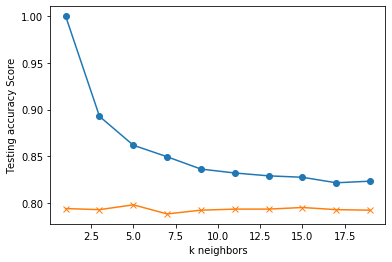

In [29]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [30]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data


knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.793


Note: KNeighborsClassifier scored 79.3%